# iShares Copper ETF CPER Analysis

##### This analysis delve deeper into iShares Copper ETF (CPER) by exploring its historical perfomance, potential correlations with copper prices and other factors, by analysing this data we aim to assess the CPER sustainability as an investment option for our investment strategy. We will consider factors like risk tolerance and long-term copper prices.

GitHub link [https://github.com/LukaVukosi05/Investment-strategy.git]

##### **Imported Libraries**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from sklearn.ensemble import RandomForestClassifier

##### The data was retrieved from Yahoo Finance which consisted of data from 2019 to 2024
##### Source: [https://finance.yahoo.com/quote/CPER/history?frequency=1mo&period1=1556841600&period2=1714766919]

In [5]:
dataset = pd.read_csv("CPER (2).csv")
dataset.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2376,2024-04-29,28.860001,29.139999,28.730000,29.090000,29.090000,288700
2377,2024-04-30,28.500000,28.590000,28.309999,28.309999,28.309999,295200
2378,2024-05-01,28.209999,28.620001,28.090000,28.379999,28.379999,150200
2379,2024-05-02,27.850000,28.080000,27.830000,28.000000,28.000000,197300
2380,2024-05-03,28.250000,28.379999,28.139999,28.370001,28.370001,95200


### Descriptive Statistics

In [7]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2.381000e+03
mean,19.813314,19.917833,19.698060,19.810466,19.810466,6.911033e+04
std,4.168791,4.206260,4.131170,4.171603,4.171603,1.375461e+05
min,11.900000,11.900000,11.900000,11.900000,11.900000,0.000000e+00
25%,16.680000,16.750000,16.610001,16.670000,16.670000,2.300000e+03
50%,18.750000,18.830000,18.700001,18.750000,18.750000,1.330000e+04
75%,23.260000,23.379999,23.120001,23.260000,23.260000,8.160000e+04
max,29.629999,30.120001,29.610001,29.900000,29.900000,1.561100e+06


In [10]:
dataset["Date"] = pd.to_datetime(dataset["Date"], format='%Y-%m-%d', errors='coerce')

In [11]:
yearly_stats = dataset.groupby(dataset['Date'].dt.year)['Close'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Min', 'min'),
    ('Max', 'max'),
    ('Std', 'std'),
    ('Var', 'var')
])
yearly_stats

,Mean,Median,Min,Max,Std,Var
Date,,,,,,
2014,19.421613,19.500000,13.050000,20.450001,1.264258,1.598347
2015,16.792460,16.939999,11.900000,19.850000,1.733059,3.003492
2016,14.541944,14.285000,12.970000,17.610001,1.035876,1.073040
2017,18.190478,17.650000,16.100000,21.160000,1.354416,1.834441
2018,18.560040,18.480000,16.320000,20.920000,1.430695,2.046889
2019,17.047579,16.850000,15.850000,18.570000,0.728216,0.530298
2020,17.487233,17.700001,13.030000,22.450001,2.234972,4.995100
2021,26.045992,26.219999,21.730000,29.600000,1.681952,2.828961
2022,24.205100,23.160000,19.510000,29.900000,3.056523,9.342333


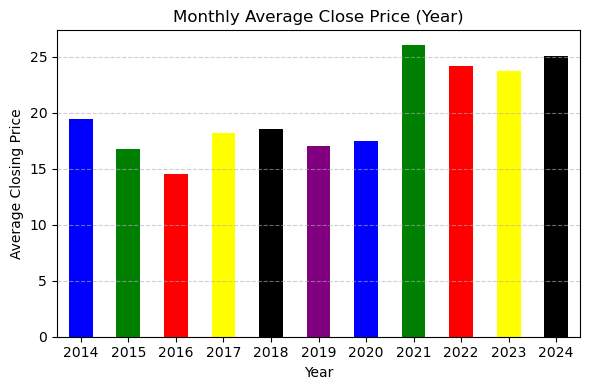

In [15]:
Mean = yearly_stats["Mean"]

colors = ['blue', 'green', 'red', 'yellow', 'black', 'purple']
plt.figure(figsize=(6, 4))
Mean.plot(kind='bar', color=colors)

plt.title('Monthly Average Close Price (Year)')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**The average closing price for the iShare Copper ETF (CPER) has increased in the last 10 years. For the past 4 years the average closing price has been above the $20 mark, which indicates that for a long-term investment this might actually provide returns if we buy the ETF in 2024 and sell it later in 40 years.**

In [17]:
volume = dataset.groupby(dataset['Date'].dt.year)['Volume'].agg([
    ('Mean', 'mean'),
])
volume

,Mean
Date,
2014,787.096774
2015,1003.174603
2016,4244.444444
2017,8595.617530
2018,10110.756972
2019,11246.428571
2020,49643.873518
2021,280132.539683
2022,146985.657371


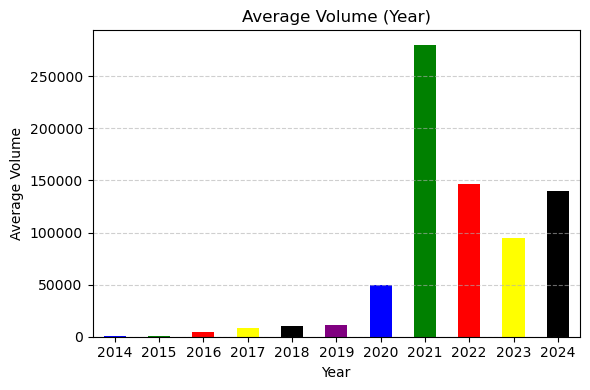

In [20]:
Mean_vol = volume["Mean"]

colors = ['blue', 'green', 'red', 'yellow', 'black', 'purple']
plt.figure(figsize=(6, 4))
Mean_vol.plot(kind='bar', color=colors)

plt.title('Average Volume (Year)')
plt.xlabel('Year')
plt.ylabel('Average Volume')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**From 2014 to 2020 iShares Copper ETF (CPER) has been performing under 50000 buys which in 2020 the demand for the ETF has increased drastically and maintained a growth, we believe that the increasing volume suggests that the demand for this ETF will increase in the long-term and also considering factors of countries industrialising and using copper for renewable energy and others. Copper is a material that can not be easily substituted.**

### Correlation Analysis and Predictions.

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.736697,0.739234,0.734913,0.737485,0.737485,0.428782
Open,0.736697,1.000000,0.999473,0.999373,0.998994,0.998994,0.579740
High,0.739234,0.999473,1.000000,0.999093,0.999413,0.999413,0.582805
Low,0.734913,0.999373,0.999093,1.000000,0.999518,0.999518,0.574120
Close,0.737485,0.998994,0.999413,0.999518,1.000000,1.000000,0.578767
Adj Close,0.737485,0.998994,0.999413,0.999518,1.000000,1.000000,0.578767
Volume,0.428782,0.579740,0.582805,0.574120,0.578767,0.578767,1.000000


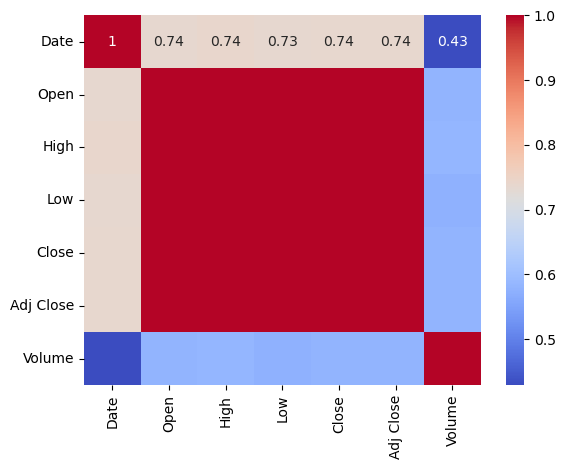

In [28]:
correls = dataset.corr()
correls

sns.heatmap(data = correls, cmap = "coolwarm", annot=True)
correls

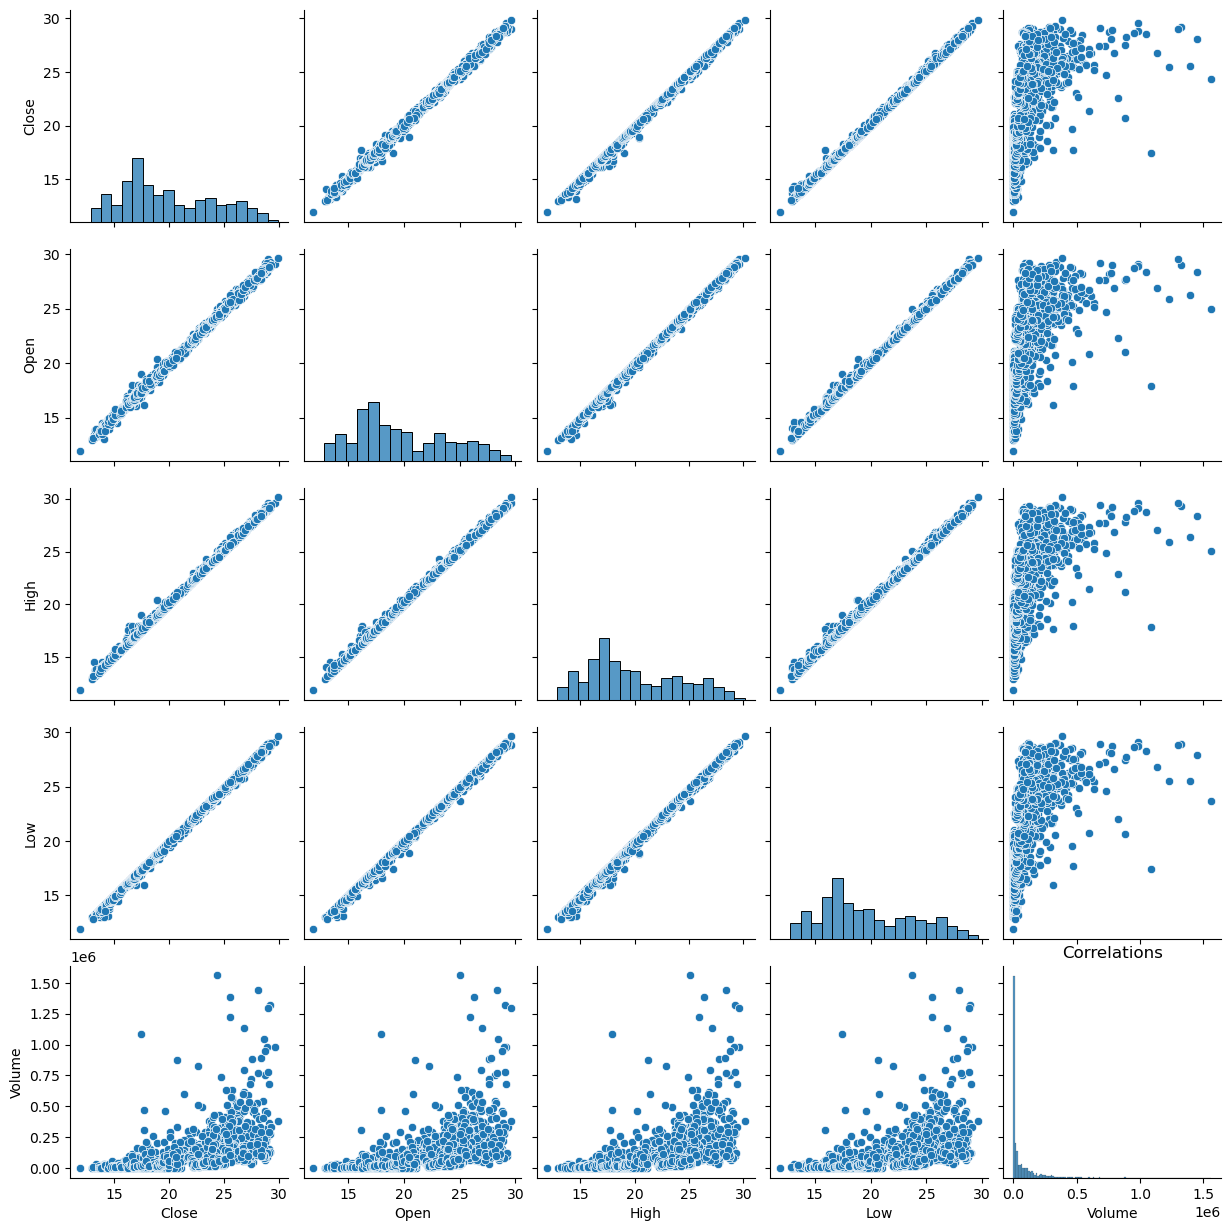

In [10]:

sns.pairplot(dataset[['Close', 'Open', 'High', 'Low', 'Volume']])
plt.title("Correlations")
plt.show()

**We want to investigate if the Closing price and the Opening price has a positive correlation and we also want to measure the performance of the opening price.**

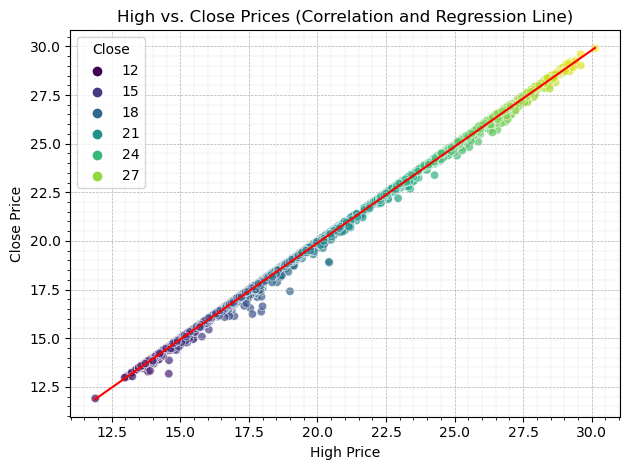

In [11]:
correlation = np.corrcoef(dataset["High"], dataset["Close"])[0, 1]
m, b = np.polyfit(dataset["High"], dataset["Close"], 1)

sns.scatterplot(
    x= "High",
    y= "Close",
    data= dataset,
    hue= "Close", 
    palette= "viridis", 
    
    alpha= 0.7 
)
plt.title("High vs. Close Prices (Correlation and Regression Line)".format(correlation))
plt.xlabel("High Price")
plt.ylabel("Close Price")

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle='--', linewidth=0.2, alpha=0.7)

x_line = np.linspace(min(dataset['High']), max(dataset['High']), 100)
y_line = m * x_line + b
plt.plot(x_line, y_line, color='red', label= "Regression Line")

plt.tight_layout()
plt.show()


**There is a positive correlation between Closing price and High which indicates that if our High price increase over time we also the cosing price will increase which is our ROI.**

**The graph has a very linear regression which suggests that over time as the high price increase so will the closing price. This promises a good return on investments.**

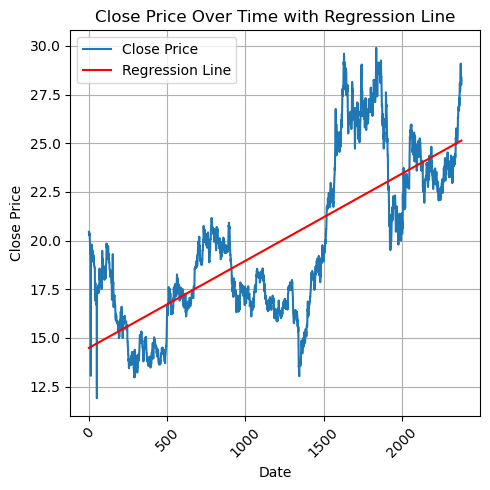

In [28]:
m, b = np.polyfit(dataset.index.to_numpy(), dataset['Close'], 1) 

plt.figure(figsize=(5, 5))
plt.plot(dataset.index, dataset['Close'], label='Close Price')
x_fit = np.linspace(dataset.index.min(), dataset.index.max(), 100)
y_fit = m * x_fit + b
plt.plot(x_fit, y_fit, color='red', label="Regression Line")

plt.title("Close Price Over Time with Regression Line")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

In [32]:
dataset["Future"] = dataset["Close"].shift(-1)
dataset["ROI"] = (dataset["Future"] > dataset["Close"]).astype(int)
dataset.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Future,ROI
2371,2024-04-22,28.040001,28.150000,27.920000,28.110001,28.110001,216400,27.670000,0
2372,2024-04-23,27.610001,27.780001,27.500000,27.670000,27.670000,471600,27.930000,1
2373,2024-04-24,27.870001,28.090000,27.860001,27.930000,27.930000,125400,28.370001,1
2374,2024-04-25,28.320000,28.410000,28.170000,28.370001,28.370001,186200,28.549999,1
2375,2024-04-26,28.549999,28.650000,28.290001,28.549999,28.549999,187300,29.090000,1
2376,2024-04-29,28.860001,29.139999,28.730000,29.090000,29.090000,288700,28.309999,0
2377,2024-04-30,28.500000,28.590000,28.309999,28.309999,28.309999,295200,28.379999,1
2378,2024-05-01,28.209999,28.620001,28.090000,28.379999,28.379999,150200,28.000000,0
2379,2024-05-02,27.850000,28.080000,27.830000,28.000000,28.000000,197300,28.370001,1
2380,2024-05-03,28.250000,28.379999,28.139999,28.370001,28.370001,95200,NaN,0


### Prediction Model

In [37]:
model = RandomForestClassifier(n_estimators = 500, min_samples_split = 100, random_state = 1)
train = dataset.iloc[:-100]
test = dataset.iloc[-100:]

predictors = ["Open", "High", "Low", "Close", "Volume"]
model.fit(train[predictors], train["ROI"])

RandomForestClassifier(min_samples_split=100, n_estimators=500, random_state=1)

In [46]:
forecast = model.predict(test[predictors])
forecast = pd.Series(forecast, index=test.index)
mse = mean_squared_error(test["ROI"], forecast)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.53


<Axes: >

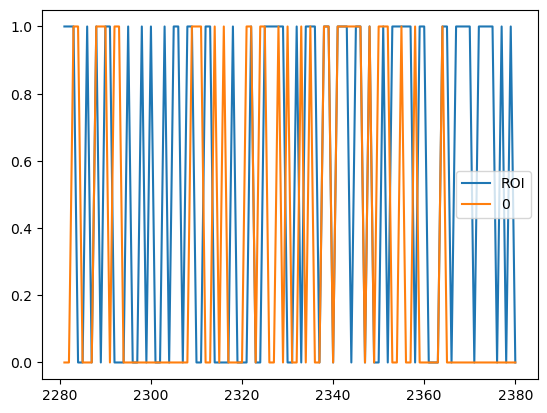

In [48]:
pred_plot = pd.concat([test["ROI"], forecast], axis = 1)
pred_plot.plot()

### Volatility Analysis

In [56]:
volatility = dataset["Close"]
frame1 = pd.DataFrame(volatility)
frame1.tail(6)

,Close
2375,28.549999
2376,29.090000
2377,28.309999
2378,28.379999
2379,28.000000
2380,28.370001


In [58]:

returns = (volatility/volatility.shift(1)) - 1
frame = pd.DataFrame(returns)
frame

,Close
0,NaN
1,0.000000
2,-0.003423
3,-0.005397
4,0.004933
...,...
2376,0.018914
2377,-0.026813
2378,0.002473
2379,-0.013390


In [67]:
etf_volatility = returns.std() * np.sqrt(225)
etf_volatility = etf_volatility * 100
print("ETF volatility: {0}".format(etf_volatility))

ETF volatility: 32.97429527413431


The ETF has a high volatility rate which might pose a risk of influctuations in the future

### **Monte Carlo Simulation**

In [82]:

def monte_carlo_simulation(dataset, num_sims=1000):
 
  daily_log_returns = np.log(dataset["Close"] / dataset["Close"].shift(1))
  daily_log_returns.dropna(inplace=True)
    
  average_return = daily_log_returns.mean()
  std_dev = daily_log_returns.std()

  simulated_daily_returns = np.random.normal(average_return, std_dev, size=(num_sims, len(daily_log_returns)))

  simulated_prices = np.exp(simulated_daily_returns).cumprod(axis=1) * dataset["Close"][1]

  simulated_data = pd.DataFrame(simulated_prices, columns=dataset.index[1:])

  return simulated_data

simulated_data = monte_carlo_simulation(dataset.copy(), num_sims=500)

simulated_data


,1,2,3,4,5,6,7,8,9,10,...,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380
0,20.183241,20.028783,19.907114,19.848424,19.706428,19.938474,19.579235,20.403467,20.489011,20.899199,...,17.922385,18.065360,18.196269,18.473582,18.936750,18.959550,19.280595,19.867956,20.174303,20.087067
1,19.979514,19.908657,19.509613,20.050592,20.218461,20.174697,19.333493,19.237390,19.720885,19.252109,...,7.978787,7.754637,7.768179,8.050126,7.719409,7.509511,7.144171,7.549473,7.316162,7.040573
2,21.298906,21.887529,21.987213,21.510289,22.070656,21.273805,21.924730,22.122949,20.936969,21.090249,...,96.542215,95.080041,95.793142,97.592170,99.458998,101.001418,105.661415,105.308111,109.253588,109.642111
3,20.180487,20.611333,21.861662,21.978982,22.239541,22.530231,23.363936,22.924763,23.000908,23.122137,...,33.534065,33.181391,33.192332,32.985848,32.714999,33.479979,33.385899,33.122531,31.869205,32.683742
4,20.484074,19.936622,19.957904,20.152154,20.380660,21.256226,21.076831,20.913714,21.009708,19.984321,...,21.957814,21.873731,21.368952,21.778661,21.535980,22.250857,21.828091,21.932495,20.548384,19.743162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,20.624953,20.815073,19.861192,19.360413,19.489717,19.397188,18.779923,18.860734,18.236659,18.047428,...,155.064342,152.892172,151.442308,149.691560,149.511118,151.298440,149.534243,147.687569,146.434481,144.133216
496,20.856339,20.736055,20.474435,19.914284,20.636409,20.986492,21.144474,21.432191,21.345070,20.921058,...,49.395661,49.967307,49.515031,48.824197,49.675886,48.931282,49.502459,48.968310,49.102548,49.839559
497,20.777128,22.408175,21.114054,20.547628,20.293585,19.558801,19.324914,19.723250,19.928905,19.398815,...,38.399489,38.169198,37.849945,38.249617,38.881189,38.040199,37.122298,36.598772,36.174493,36.922849
498,19.661786,19.523986,19.658710,19.972558,19.251948,19.245715,19.154207,19.275644,19.415341,19.974383,...,40.062572,39.678171,39.796524,40.344458,39.347524,40.234870,40.336936,41.490034,41.170038,41.291552


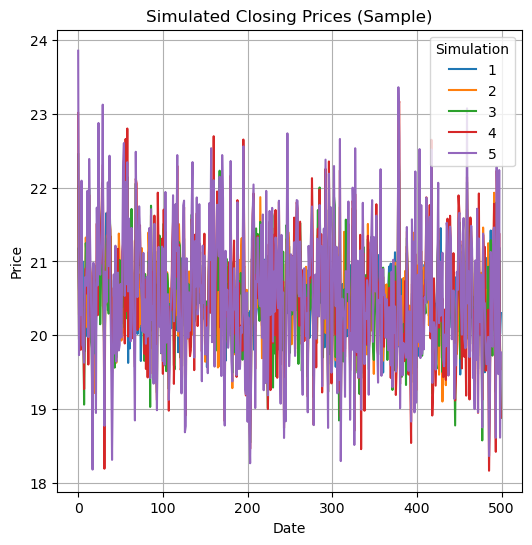

In [81]:
num_to_plot = 5

simulations_to_plot = simulated_data.iloc[:, :num_to_plot]

simulations_to_plot.plot(figsize=(6, 6))
plt.title("Simulated Closing Prices (Sample)")
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(title="Simulation")
plt.grid(True)
plt.show()

In [87]:
def calculate_dcf(free_cash_flows, discount_rate, terminal_growth_rate):
  
  present_value = 0
  for i, cash_flow in enumerate(free_cash_flows):
    present_value += cash_flow / (1 + discount_rate) ** (i + 1)

  # Calculate the present value of the terminal value (perpetuity growth model)
  terminal_value = cash_flow / (discount_rate - terminal_growth_rate)
  present_value += terminal_value / (1 + discount_rate) ** len(free_cash_flows)

  return present_value

free_cash_flows = dataset["Close"]
discount_rate = 0.10 
terminal_growth_rate = 0.02

company_value = calculate_dcf(free_cash_flows, discount_rate, terminal_growth_rate)

print(f"Present value of the ETF: ${company_value:.2f}")


Present value of the ETF: $196.54


### Projection Analysis


In [92]:
returns = dataset["Close"].pct_change()
frame = pd.DataFrame(returns)
frame.tail(5)

,Close
2376,0.018914
2377,-0.026813
2378,0.002473
2379,-0.013390
2380,0.013214


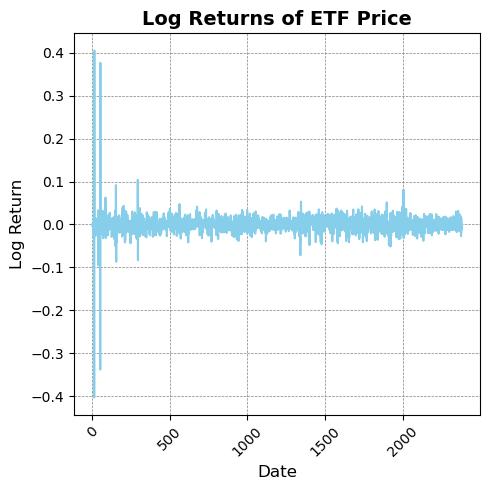

In [121]:
etf_price = dataset["Close"]

log_returns = np.log(etf_price / etf_price.shift(1)).dropna()

plt.figure(figsize=(5, 5))
plt.plot(log_returns, color='skyblue', linewidth=1.5)

plt.title('Log Returns of ETF Price', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Log Return', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

plt.xticks(rotation=45)


plt.tight_layout() 
plt.show()



# Investment prediction after a 40 year period

In [19]:
def future_value_compound(principal_amount, interest_rate, investement_period):
    inflation_rate = 0.03 
    adjusted_interest_rate = interest_rate - inflation_rate
    future_value = principal_amount * (1 + adjusted_interest_rate) ** investement_period
    return future_value

principal_amount= 40600 ###(Money excludes expense ration for then next 40 years)  
interest_rate = 0.018  
investement_period = 40  

future_value = future_value_compound(principal_amount, interest_rate, investement_period)
print("Future value after 40 years (considering inflation):", future_value)

Future value after 40 years (considering inflation): 25049.77429315323


### Therefor the projections suggest thatafter 40 years and excluding any additional costs our ROI will be R65000 making capital gains of 25049.77

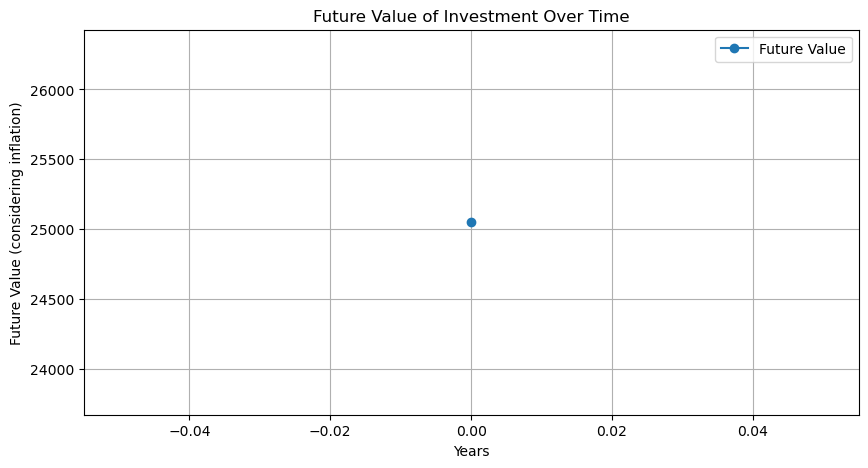

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(future_value, '-o', label='Future Value')
plt.title('Future Value of Investment Over Time')
plt.xlabel('Years')
plt.ylabel('Future Value (considering inflation)')
plt.legend()
plt.grid(True)
plt.show()